## Section: Model Training / Model Evaluation

### Goals:
With the cleaned data, I will utilise 2 different models to obtain the best accuracy for the data.

### Dataset:
My dataset is a pickle file obtained from webscrapping the below two sub-reddits:

Python: https://www.reddit.com/r/Python/

Javascript: https://www.reddit.com/r/javascript/

### Tasks:

1) [Model Training](#Section-8:-Model-Training)
<br>
<br>
2) [Model Evaluation](#Section-9:-Model-Evaluation)
<br>
<br>
3) [Conclusion / Limitations](#Section-10:-Conclusion-/-Limitations)

## Section 7: Feature Engineering
<br>
<br>
I will utilise both Random Forest (Mandatory) and Logistic Regression on both Tfidf Vectorizer and CountVectorizer data to obtain the best accuracy result.
<br>
<br>
Due to the context of the problem, differentiating sub-reddits, I will mainly utilise Accuracy score to measure the effectiveness of a model.

In [1]:
import os
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from IPython.display import display, Javascript
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve

In [2]:
def percentage_error(x,y):
    return (abs(x-y) / x) * 100

In [3]:
df = pd.read_pickle('./Data/Data.pkl')
df = df.drop(['Number of Words', 'Number of Letters'], axis=1)
df

,combined,subreddit
0,attribution error running python file using p...,0
1,attribution error running python script power...,0
2,search help,0
3,api scraping live sports data,0
4,fair share google searches went official docs ...,0
...,...,...
9987,github meandmybadself zip2state automatically...,1
9988,must healthcare software hospitals clinics,1
9989,tldr structure full stack react express node d...,1
9990,react express node docker amp helm kubernetes,1


In [4]:
X = df['combined']
y = df['subreddit']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

## Section 8: Model Training

## Grid Search Over TFIDF and Random Forest
<br>
Utilizing Random Forest on TFIDF Data

In [6]:
pipe_tfid_rf = Pipeline([ ('tfid', TfidfVectorizer()), ('rf', RandomForestClassifier()) ])

pipe_tfid_rf_params = { 
                    'tfid__max_features':[4000,5000], 
                    'tfid__stop_words':[None, 'english'], 
                    'tfid__ngram_range': [(1,1), (1,2)],
                    'rf__max_depth':[50,100,150,200], 
                    'rf__max_features':[150,200,250,300,350], 
                    'rf__min_samples_split':[30,40,50], 
                    'rf__min_samples_leaf':[30,40,50] 
                    }

In [7]:
gs_tfid_rf = GridSearchCV(pipe_tfid_rf, param_grid=pipe_tfid_rf_params, cv=5, n_jobs=-1) 
gs_tfid_rf.fit(X_train,y_train)
gs_tfid_rf.best_params_

{'rf__max_depth': 100,
 'rf__max_features': 300,
 'rf__min_samples_leaf': 30,
 'rf__min_samples_split': 30,
 'tfid__max_features': 5000,
 'tfid__ngram_range': (1, 2),
 'tfid__stop_words': None}

In [8]:
joblib.dump(gs_tfid_rf, 'Data/gs_tfid_rf.pkl', compress=3 )

['Data/gs_tfid_rf.pkl']

In [9]:
gs_tfid_rf.score(X_train, y_train)

0.8140569395017794

In [10]:
gs_tfid_rf.score(X_test, y_test)

0.826

In [11]:
percentage_error(gs_tfid_rf.score(X_train, y_train),gs_tfid_rf.score(X_test, y_test))

1.4671038251366046

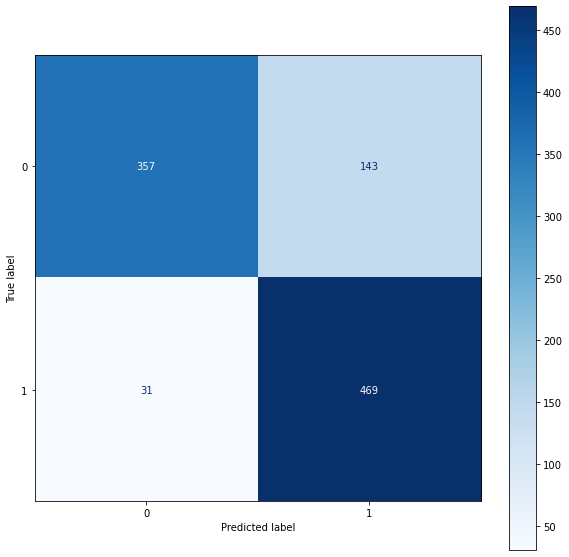

In [12]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gs_tfid_rf, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show();

In [13]:
print(classification_report(y_test, gs_tfid_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80       500
           1       0.77      0.94      0.84       500

    accuracy                           0.83      1000
   macro avg       0.84      0.83      0.82      1000
weighted avg       0.84      0.83      0.82      1000



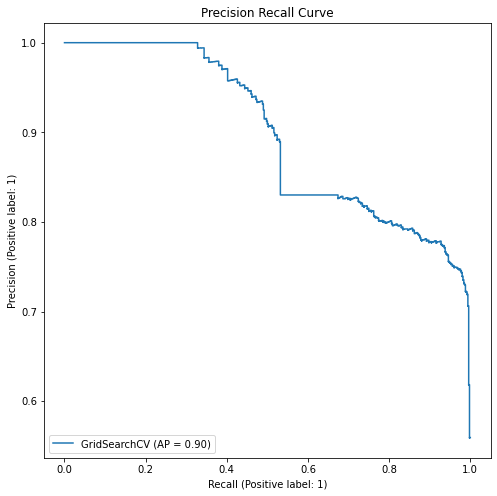

In [14]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Precision Recall Curve')
plot_precision_recall_curve(gs_tfid_rf, X_test, y_test, ax=ax);

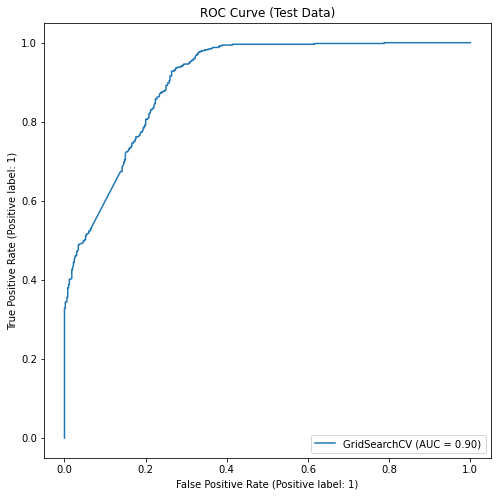

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('ROC Curve (Test Data)')
plot_roc_curve(gs_tfid_rf, X_test, y_test, ax=ax);

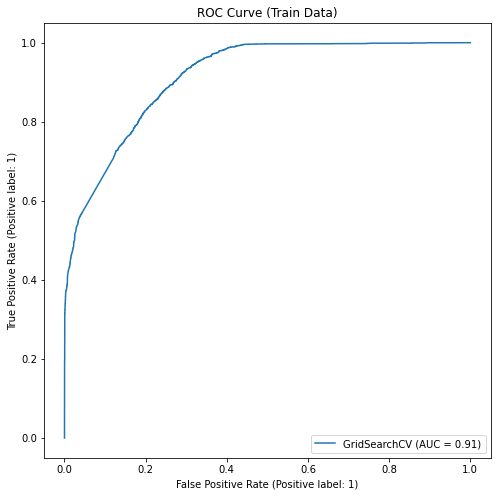

In [16]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('ROC Curve (Train Data)')
plot_roc_curve(gs_tfid_rf, X_train, y_train, ax=ax);

### Model Evaluation
<br>
1) This model satisfies generalization of less than 5%.
<br>
<br>
2) However, while it does well in generalization, it fares badly in its accuracy. Only getting correct result in 4 out of 5 scenarios.
<br>
<br>
3) I will continue to trial different models.

## Grid Search Over TFIDF and Logistic Regression
<br>
Utilizing Logistic Regression on TFID Data

In [17]:
pipe_tfid_lg = Pipeline([ ('tfid', TfidfVectorizer()), ('lg', LogisticRegressionCV()) ])

pipe_tfid_lg_params = { 
                    'tfid__max_features':[4000,5000], 
                    'tfid__stop_words':[None, 'english'], 
                    'tfid__ngram_range': [(1,1), (1,2)], 
                    'lg__Cs':[0.01,0.1,1,10,100,1000],
                    'lg__solver':['saga'],
                    'lg__max_iter':[10000]
                    }

In [18]:
gs_tfid_lg = GridSearchCV(pipe_tfid_lg, param_grid=pipe_tfid_lg_params, cv=5, n_jobs=-1) 
gs_tfid_lg.fit(X_train,y_train)
gs_tfid_lg.best_params_

C:\Users\lydra\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.77357406 0.79070043
 0.78069506 0.78224826 0.78614228 0.77590801 0.78270013 0.78358104
 0.85642784 0.85720673 0.85409166 0.85498148 0.85920858 0.85976476
 0.85375864 0.8576508  0.8576513  0.85742926 0.85698327 0.85620481
 0.85887494 0.85920852 0.85642821 0.85798426 0.85765148 0.85798512
 0.85631611 0.85631611 0.85843013 0.85876371 0.85676198 0.85620562]
  warnings.warn(


{'lg__Cs': 10,
 'lg__max_iter': 10000,
 'lg__solver': 'saga',
 'tfid__max_features': 5000,
 'tfid__ngram_range': (1, 1),
 'tfid__stop_words': 'english'}

In [19]:
joblib.dump(gs_tfid_lg, 'Data/gs_tfid_lg.pkl', compress=3 )

['Data/gs_tfid_lg.pkl']

In [20]:
gs_tfid_lg.score(X_train, y_train)

0.9383896797153025

In [21]:
gs_tfid_lg.score(X_test, y_test)

0.851

In [22]:
percentage_error(gs_tfid_lg.score(X_train, y_train),gs_tfid_lg.score(X_test, y_test))

9.312728134629063

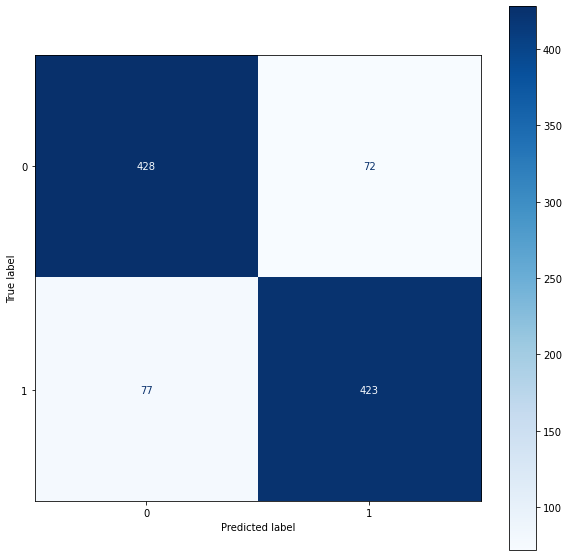

In [23]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gs_tfid_lg, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show();

In [24]:
print(classification_report(y_test, gs_tfid_lg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       500
           1       0.85      0.85      0.85       500

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



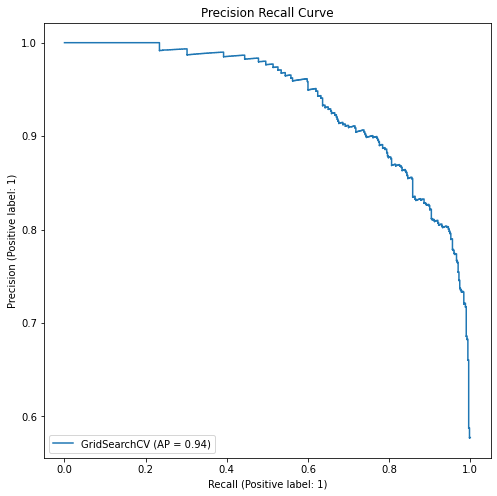

In [25]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Precision Recall Curve')
plot_precision_recall_curve(gs_tfid_lg, X_test, y_test, ax=ax);

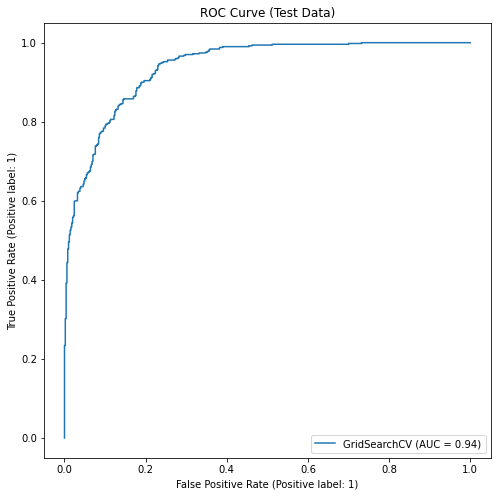

In [26]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('ROC Curve (Test Data)')
plot_roc_curve(gs_tfid_lg, X_test, y_test, ax=ax);

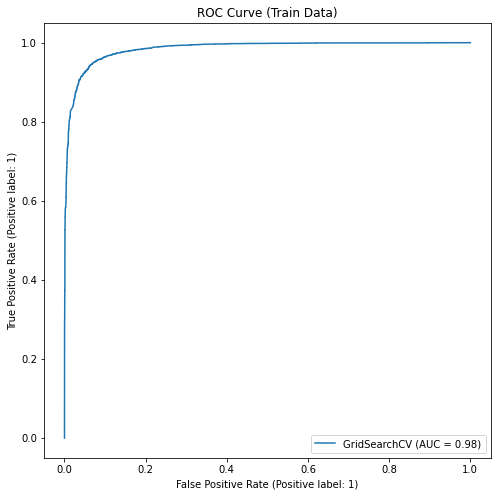

In [27]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('ROC Curve (Train Data)')
plot_roc_curve(gs_tfid_lg, X_train, y_train, ax=ax);

### Model Evaluation
<br>
1) In contrast to the Random Forest Model. Logistic Regression does poorly on generalization but scores on accuracy.
<br>
<br>
2) It's accuracy on the test data is a marked improvement over the Random Forest Model as evidenced by the Area under the Curve (AUC) is 0.95 (Test Data) and 0.99 (Train Data).

## Grid Search Over Count Vectorizer and Random Forest
<br>
Utilizing Random Forest on Count Vectorizer Data

In [28]:
pipe_count_rf = Pipeline([ ('cv', CountVectorizer()), ('rf', RandomForestClassifier()) ])

pipe_count_rf_params = { 
                    'cv__max_features':[4000,5000], 
                    'cv__stop_words':[None, 'english'], 
                    'cv__ngram_range': [(1,1), (1,2)], 
                    'rf__max_depth':[50,100,150,200], 
                    'rf__max_features':[150,200,250,300,350], 
                    'rf__min_samples_split':[30,40,50], 
                    'rf__min_samples_leaf':[30,40,50] 
                    }

In [29]:
gs_count_rf = GridSearchCV(pipe_count_rf, param_grid=pipe_count_rf_params, cv=5, n_jobs=-1) 
gs_count_rf.fit(X_train,y_train)
gs_count_rf.best_params_

{'cv__max_features': 5000,
 'cv__ngram_range': (1, 1),
 'cv__stop_words': None,
 'rf__max_depth': 200,
 'rf__max_features': 250,
 'rf__min_samples_leaf': 30,
 'rf__min_samples_split': 50}

In [30]:
joblib.dump(gs_count_rf, 'Data/gs_count_rf.pkl', compress=3 )

['Data/gs_count_rf.pkl']

In [31]:
gs_count_rf.score(X_train, y_train)

0.8016014234875445

In [32]:
gs_count_rf.score(X_test, y_test)

0.807

In [33]:
percentage_error(gs_count_rf.score(X_train, y_train),gs_count_rf.score(X_test, y_test))

0.6734739178690408

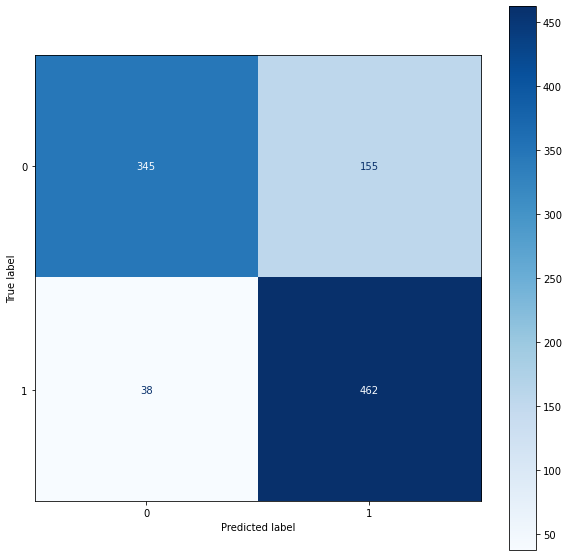

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gs_count_rf, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show();

In [35]:
print(classification_report(y_test, gs_count_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78       500
           1       0.75      0.92      0.83       500

    accuracy                           0.81      1000
   macro avg       0.82      0.81      0.80      1000
weighted avg       0.82      0.81      0.80      1000



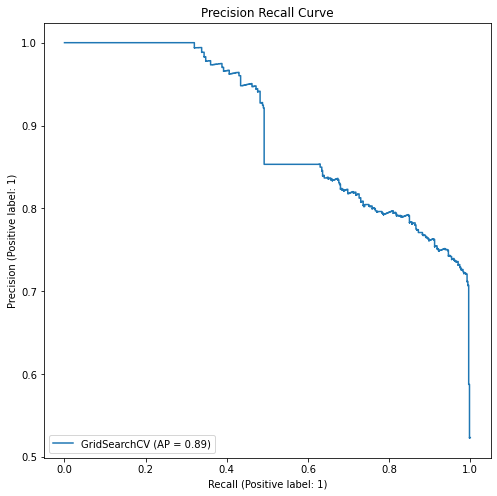

In [36]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Precision Recall Curve')
plot_precision_recall_curve(gs_count_rf, X_test, y_test, ax=ax);

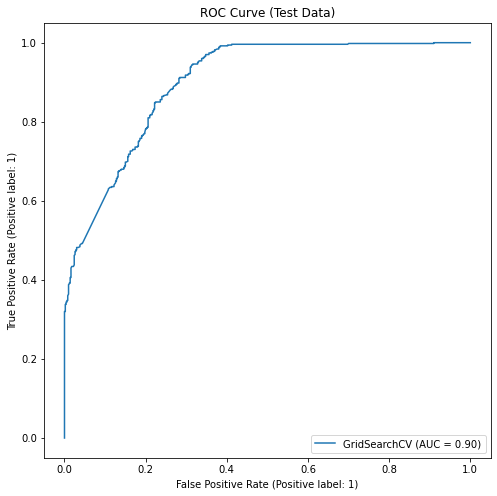

In [37]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('ROC Curve (Test Data)')
plot_roc_curve(gs_count_rf, X_test, y_test, ax=ax);

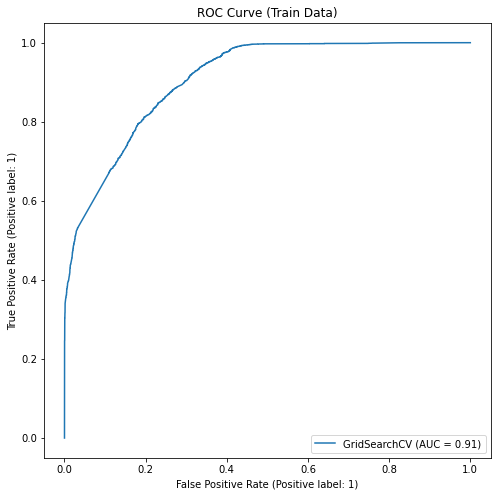

In [38]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('ROC Curve (Train Data)')
plot_roc_curve(gs_count_rf, X_train, y_train, ax=ax);

### Model Evaluation
<br>
<br>
1) Similar to the Random Forest Model trained on data that has been TFIDF Vectorized, this model does well on generalization but it does poorly on Accuracy.
<br>
<br>
2) I will continue to trial different models.

## Grid Search Over Count Vectorizer and Logistic Regression
<br>
Utilizing Logistic Regression on Count Vectorizer Data

In [39]:
pipe_count_lg = Pipeline([ ('cv', CountVectorizer()), ('lg', LogisticRegressionCV()) ])

pipe_count_lg_params = { 
                    'cv__max_features':[4000,5000], 
                    'cv__stop_words':[None, 'english'], 
                    'cv__ngram_range': [(1,1), (1,2)], 
                    'lg__Cs':[0.01,0.1,1,10,100,1000],
                    'lg__solver':['saga'],
                    'lg__max_iter':[10000]
                    }

In [40]:
gs_count_lg = GridSearchCV(pipe_count_lg, param_grid=pipe_count_lg_params, cv=5, n_jobs=-1) 
gs_count_lg.fit(X_train,y_train)
gs_count_lg.best_params_

C:\Users\lydra\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.73687557 0.84152536 0.83830072 0.83674406
        nan        nan 0.74666206 0.84252628 0.83596566 0.83374103
        nan        nan 0.73531866 0.84052468 0.83663245 0.8351872
        nan        nan 0.744327   0.83863449 0.83451967 0.83162856
        nan        nan 0.73709798 0.84241505 0.83896801 0.83641041
        nan        nan 0.74688459 0.84197017 0.83618813 0.83385226
        nan        nan 0.73587465 0.84030215 0.83696597 0.83485362
        nan        nan 0.74488299 0.84052517 0.83618801 0.83173979]
  warnings.warn(


{'cv__max_features': 4000,
 'cv__ngram_range': (1, 1),
 'cv__stop_words': 'english',
 'lg__Cs': 10,
 'lg__max_iter': 10000,
 'lg__solver': 'saga'}

In [41]:
joblib.dump(gs_count_lg, 'Data/gs_count_lg.pkl', compress=3 )

['Data/gs_count_lg.pkl']

In [42]:
gs_count_lg.score(X_train, y_train)

0.8776690391459074

In [43]:
gs_count_lg.score(X_test, y_test)

0.844

In [44]:
percentage_error(gs_count_lg.score(X_train, y_train),gs_count_lg.score(X_test, y_test))

3.8361885453623916

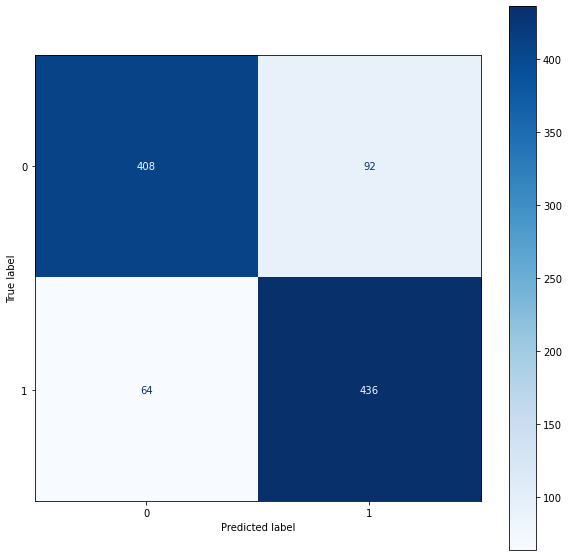

In [45]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gs_count_lg, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show();

In [46]:
print(classification_report(y_test, gs_count_lg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       500
           1       0.83      0.87      0.85       500

    accuracy                           0.84      1000
   macro avg       0.85      0.84      0.84      1000
weighted avg       0.85      0.84      0.84      1000



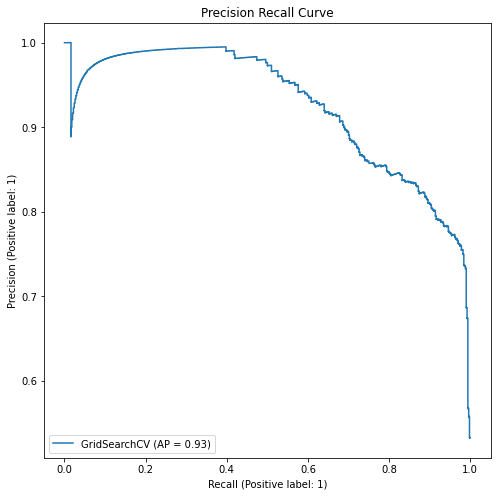

In [47]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Precision Recall Curve')
plot_precision_recall_curve(gs_count_lg, X_test, y_test, ax=ax);

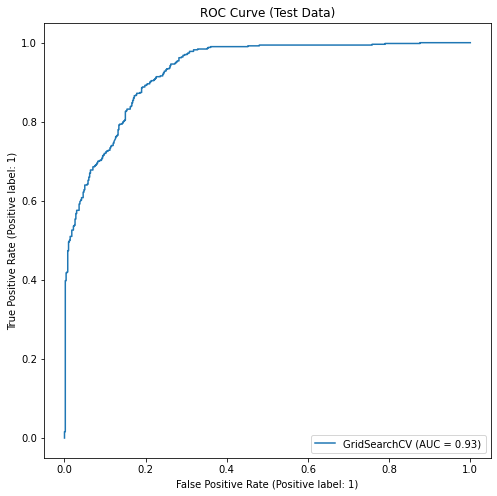

In [48]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('ROC Curve (Test Data)')
plot_roc_curve(gs_count_lg, X_test, y_test, ax=ax);

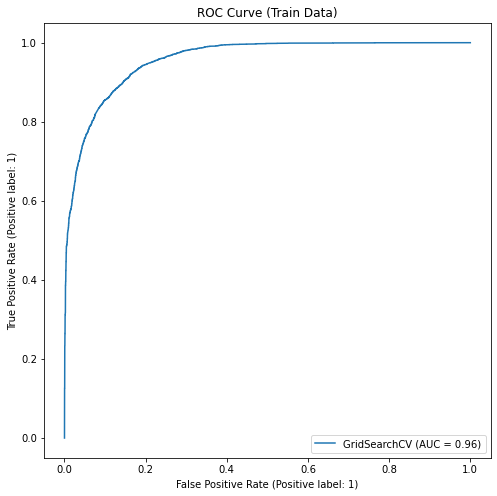

In [49]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('ROC Curve (Train Data)')
plot_roc_curve(gs_count_lg, X_train, y_train, ax=ax);

### Model Evaluation
<br>
<br>
1) This model does marginally worse than Logistic Regression model trained on data that has been feature engineered with TFIDF Vectorizer.

## Section 8: Model Evaluation
<br>
1) The best model to use is Logistic Regression on data that has been TFIDF Vectorized.
<br>
<br>
2) The table below summarises all the key metrics used in evaluating a classification model.
<br>
<br>

|Model|Accuracy (Train)|Accuracy (Test)|Precision|Sensitivity|
|---|---|---|---|---|
|TfidfVectorizer --- Random Forest|0.82|0.83|0.76|0.94|
|TfidfVectorizer --- Logistic Regression|0.95|0.88|0.86|0.89|
|CountVectorizer --- Random Forest|0.82|0.82|0.75|0.93|
|CountVectorizer --- Logistic Regression|0.89|0.87|0.84|0.90|

<br>
3) Although the best model to utilise is Logistic Regression on TFIDF Vectorized data, it does poorly on generalisation. I will do a Grid Search over the regularisation methods to reduce the generalisation score.

## Grid search Over Regularisation Methods
<br>
1) Utilising multiple regularisation methods to reduce overfitting

In [50]:
pipe_tfid_lg_reg = Pipeline([ ('tfid', TfidfVectorizer()), ('lg', LogisticRegressionCV()) ])

pipe_tfid_lg_reg_params = { 
                    'tfid__max_features':[5000], 
                    'tfid__stop_words':[None], 
                    'tfid__ngram_range': [(1,1)], 
                    'lg__Cs':[1000],
                    'lg__solver':['saga'],
                    'lg__max_iter':[10000],
                    'lg__penalty':['l1', 'l2', 'elasticnet']
                    }

In [51]:
gs_tfid_lg_reg = GridSearchCV(pipe_tfid_lg_reg, param_grid=pipe_tfid_lg_reg_params, cv=5, n_jobs=-1) 
gs_tfid_lg_reg.fit(X_train,y_train)
gs_tfid_lg_reg.best_params_

C:\Users\lydra\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.84764215 0.85843019        nan]
  warnings.warn(


{'lg__Cs': 1000,
 'lg__max_iter': 10000,
 'lg__penalty': 'l2',
 'lg__solver': 'saga',
 'tfid__max_features': 5000,
 'tfid__ngram_range': (1, 1),
 'tfid__stop_words': None}

In [52]:
gs_tfid_lg_reg.score(X_train, y_train)

0.939279359430605

In [53]:
gs_tfid_lg_reg.score(X_test, y_test)

0.848

In [54]:
percentage_error(gs_tfid_lg_reg.score(X_train, y_train),gs_tfid_lg_reg.score(X_test, y_test))

9.718020364669673

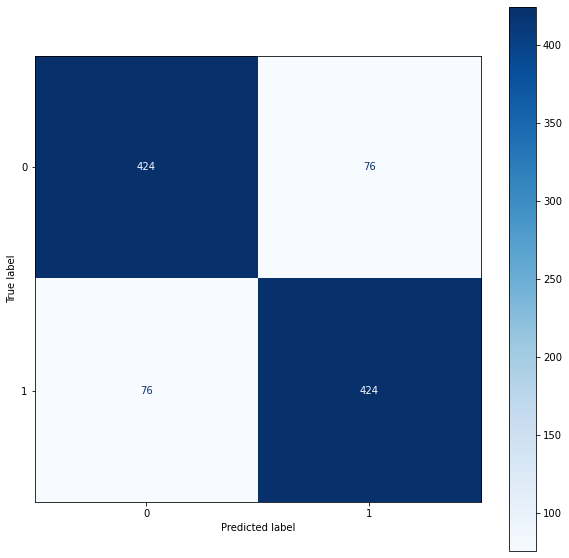

In [55]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(gs_tfid_lg_reg, X_test, y_test, cmap=plt.cm.Blues, ax=ax)
plt.show();

In [56]:
print(classification_report(y_test, gs_tfid_lg_reg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       500
           1       0.85      0.85      0.85       500

    accuracy                           0.85      1000
   macro avg       0.85      0.85      0.85      1000
weighted avg       0.85      0.85      0.85      1000



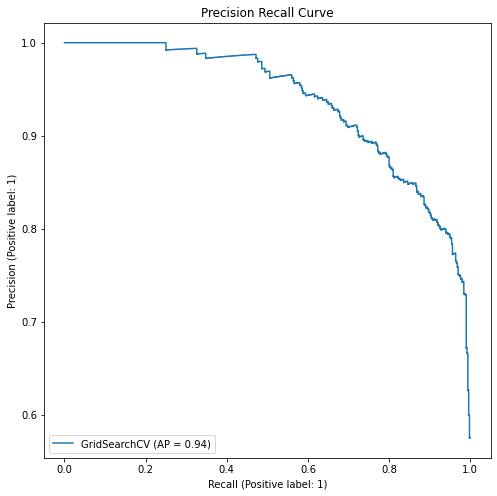

In [57]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('Precision Recall Curve')
plot_precision_recall_curve(gs_tfid_lg_reg, X_test, y_test, ax=ax);

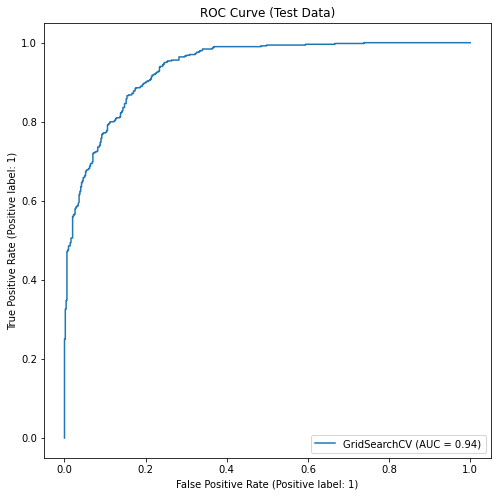

In [58]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('ROC Curve (Test Data)')
plot_roc_curve(gs_tfid_lg_reg, X_test, y_test, ax=ax);

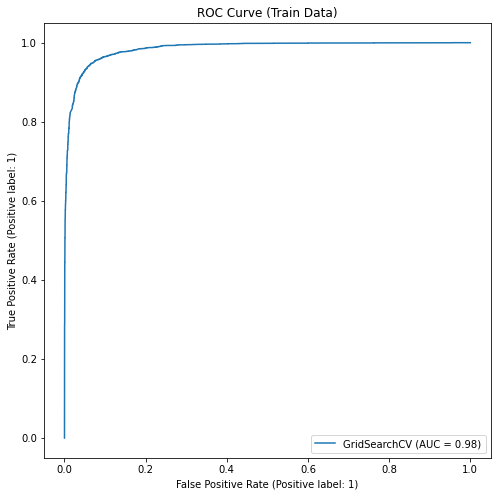

In [59]:
fig, ax = plt.subplots(figsize=(8, 8))
plt.title('ROC Curve (Train Data)')
plot_roc_curve(gs_tfid_lg_reg, X_train, y_train, ax=ax);

### Model Evaluation
<br>
<br>
1) Utilising a Grid Search over the regularisation methods does no difference to the generalization score.
<br>
<br>
2) However, while it lacks in generalization, it more than makes up for it in accuracy with a marginal increase in score.

## Section 10: Conclusion / Limitations
<br>
<br>
1) In conclusion, I will utilise Logistic Regression model on data that has been feature engineered with TFIDF Vectorizer.
<br>
<br>
2) While it lacks in generalization score (7.86%) it makes up for it in accuracy, 0.95(Train) / 0.88 (Test).
<br>
<br>
3) To improve its generalization score, more data can be provided and allocated to the training set.
<br>
<br>
4) Ensemble methods can be implemented to reduce overfitting. However due to time restrictions and limited processor capacity, they were not implemented.
<br>
<br>
5) Other models can also be trained on the training data set to compare with Random Forest and Logistic Regression.
<br>
<br>
6) Last but not least, the k-value for cross validation can be raised.